In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
data = pd.read_csv('job fake.csv')

In [4]:
data.head()

,Unnamed: 0,job_id,title,location,country,state,city,department,salary_range,company_profile,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",US,NY,New York,Marketing,NaN,"We're Food52, and we've created a groundbreaki...",...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",NZ,,Auckland,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",US,IA,Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",US,DC,Washington,Sales,NaN,Our passion for improving quality of life thro...,...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",US,FL,Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
data.shape

(17880, 22)

In [6]:
data.describe()

,Unnamed: 0,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8939.500000,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,5161.655742,0.202631,0.403492,0.499945,0.214688
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4469.750000,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8939.500000,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13409.250000,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17879.000000,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.drop(['Unnamed: 0','job_id'],axis=1,inplace=True)

In [8]:
data.columns

Index(['title', 'location', 'country', 'state', 'city', 'department',
       'salary_range', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [9]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   country              17534 non-null  object
 3   state                17440 non-null  object
 4   city                 17440 non-null  object
 5   department           6333 non-null   object
 6   salary_range         2868 non-null   object
 7   company_profile      14572 non-null  object
 8   description          17879 non-null  object
 9   requirements         15185 non-null  object
 10  benefits             10670 non-null  object
 11  telecommuting        17880 non-null  int64 
 12  has_company_logo     17880 non-null  int64 
 13  has_questions        17880 non-null  int64 
 14  employment_type      14409 non-null  object
 15  required_experience  10830 non-null  object
 16  requ

In [11]:
data.nunique()

title                  11231
location                3105
country                   90
state                    325
city                    2335
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [12]:
#checking null values
data.isna().sum()

title                      0
location                 346
country                  346
state                    440
city                     440
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [13]:
#dropping unneccessary columns
data.drop(["location", "salary_range", "department","state"],axis=1,inplace=True)

In [14]:
#filling missing values
data['required_experience'] = data['required_experience'].fillna('data_unavailable')
data['required_education'] = data['required_education'].fillna('data_unavailable')

In [15]:
text_data=data.select_dtypes(include = "object")
text_col=text_data.columns
text_col

Index(['title', 'country', 'city', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'],
      dtype='object')

In [16]:
data[text_col]=data[text_col].replace(np.nan,"Not Specified")

In [17]:
data.isna().sum()

title                  0
country                0
city                   0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [18]:
#checking duplicated values
data.duplicated().sum()

338

In [19]:
data.loc[data.duplicated(),:]

,title,country,city,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
146,Customer Service Associate,US,Dallas,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 6 months customer ser...,Not Specified,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
402,Inside Sales Professional-Omaha,US,Omaha,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,data_unavailable,data_unavailable,Building Materials,Sales,0
495,Customer Service Associate - Part Time,US,Warrenville,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Specified,0,1,0,Full-time,Entry level,High School or equivalent,Insurance,Administrative,0
701,English Teacher Abroad,US,Mansfield,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,data_unavailable,Bachelor's Degree,Education Management,Not Specified,0
1019,Texas Captioning Assistant,US,Lubbock,"Why CSD?CSD is not only a great place to work,...",Captioning Assistants provide quick and accura...,A minimum of a High School Diploma or equivale...,CSD offers a competitive benefits package for ...,0,1,1,Not Specified,Entry level,High School or equivalent,Telecommunications,Customer Service,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,Home Based Payroll Typist/Data Entry Clerks Po...,US,Aberdeen,Not Specified,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,Not Specified,data_unavailable,data_unavailable,Not Specified,Not Specified,1
17742,Data Entry Admin/Clerical Positions - Work Fro...,US,Omaha,Not Specified,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,Not Specified,Not Specified,0,0,0,Not Specified,data_unavailable,data_unavailable,Not Specified,Not Specified,1
17761,Payroll Data Coordinator Positions - Earn $100...,US,Aberdeen,Not Specified,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,0,0,Not Specified,data_unavailable,data_unavailable,Not Specified,Not Specified,1
17791,Data Entry Admin/Clerical Positions - Work Fro...,US,Omaha,Not Specified,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,Not Specified,Not Specified,0,0,0,Not Specified,data_unavailable,data_unavailable,Not Specified,Not Specified,1


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
type(data.title[0])

str

In [22]:
data['title'].value_counts()

English Teacher Abroad                                         297
Customer Service Associate                                     141
Graduates: English Teacher Abroad (Conversational)             135
English Teacher Abroad                                          94
Software Engineer                                               86
                                                              ... 
Director of Program Management - Six Sigma Lean - PA             1
DP - Director of Photography                                     1
Senior Mechanical Design Engineer                                1
.Net Production Support                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [23]:
data.title = data.title.str.strip()

In [24]:
data['title'].value_counts()

English Teacher Abroad                                         391
Customer Service Associate                                     191
Graduates: English Teacher Abroad (Conversational)             135
Software Engineer                                               90
Customer Service Associate - Part Time                          85
                                                              ... 
Accounting Professional                                          1
IHF Co-Director                                                  1
Online advertising implementation specialist                     1
Equity Derivatives / Junior Sales position                       1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [25]:
data['telecommuting'].value_counts()

0    16793
1      749
Name: telecommuting, dtype: int64

In [26]:
data['has_company_logo'].value_counts()

1    13935
0     3607
Name: has_company_logo, dtype: int64

In [27]:
data['employment_type'].value_counts()

Full-time        11403
Not Specified     3413
Contract          1492
Part-time          772
Temporary          237
Other              225
Name: employment_type, dtype: int64

In [28]:
data['has_questions'].value_counts()

0    8913
1    8629
Name: has_questions, dtype: int64

In [29]:
data['required_experience'].value_counts()

data_unavailable    6935
Mid-Senior level    3762
Entry level         2621
Associate           2263
Not Applicable      1067
Director             382
Internship           372
Executive            140
Name: required_experience, dtype: int64

In [30]:
data['required_education'].value_counts()

data_unavailable                     7992
Bachelor's Degree                    5072
High School or equivalent            1985
Unspecified                          1361
Master's Degree                       416
Associate Degree                      263
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [31]:
data['industry'].value_counts()

Not Specified                          4822
Information Technology and Services    1708
Computer Software                      1360
Internet                               1054
Marketing and Advertising               817
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

In [32]:
data['function'].value_counts()

Not Specified             6335
Information Technology    1730
Sales                     1440
Engineering               1339
Customer Service          1176
Marketing                  815
Administrative             612
Design                     336
Health Care Provider       326
Other                      325
Education                  315
Management                 306
Business Development       226
Accounting/Auditing        210
Human Resources            199
Project Management         183
Finance                    165
Consulting                 138
Writing/Editing            131
Art/Creative               131
Production                 115
Product Management         113
Quality Assurance          110
Advertising                 89
Business Analyst            83
Data Analyst                82
Public Relations            76
Manufacturing               73
General Business            68
Research                    50
Strategy/Planning           46
Legal                       44
Training

In [33]:
data['fraudulent'].value_counts()

0    16702
1      840
Name: fraudulent, dtype: int64

# EDA


In [34]:
fake=data[data["fraudulent"]==0]["fraudulent"].count()
real=data[data["fraudulent"]==1]["fraudulent"].count()

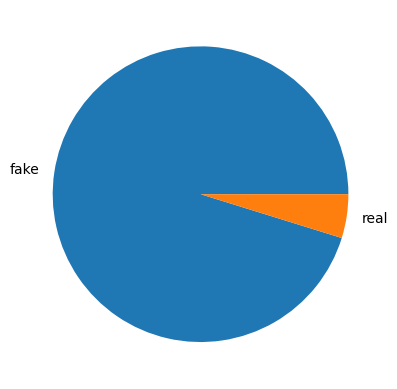

In [35]:
plt.pie([fake,real],labels=["fake","real"]);

<function matplotlib.pyplot.show(close=None, block=None)>

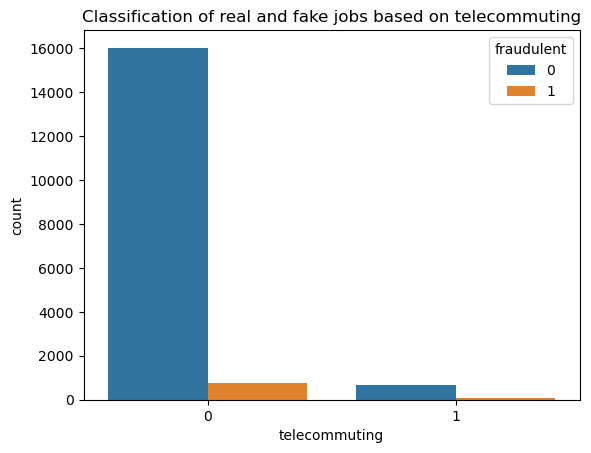

In [36]:
sns.countplot(x="telecommuting",hue="fraudulent",data=data);
plt.title("Classification of real and fake jobs based on telecommuting")
plt.show

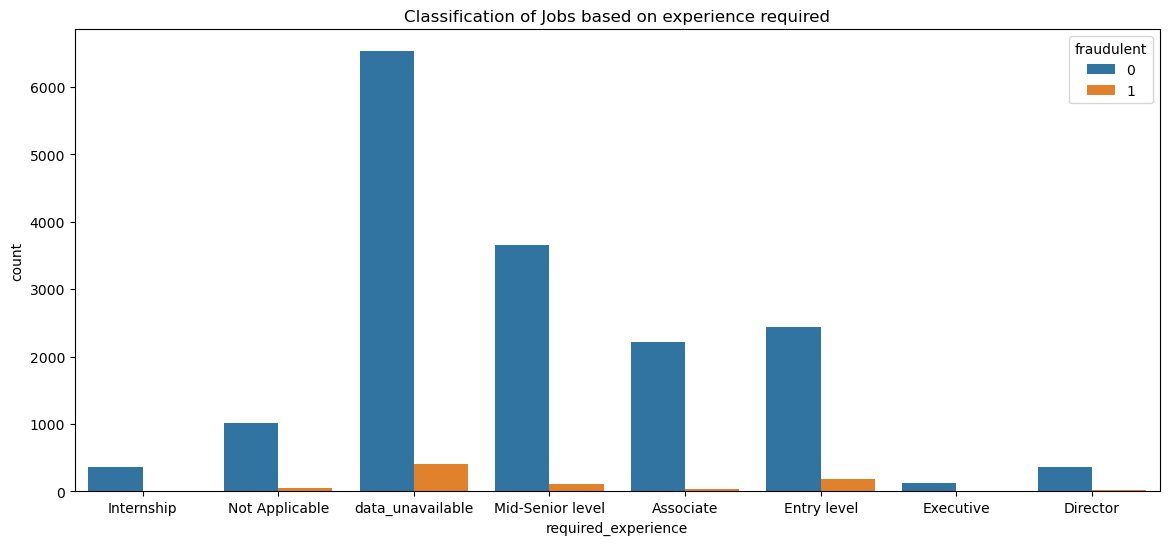

In [37]:
plt.figure(figsize=(14,6))
plt.title("Classification of Jobs based on experience required")
sns.countplot(x="required_experience", hue="fraudulent",data=data);
plt.show()

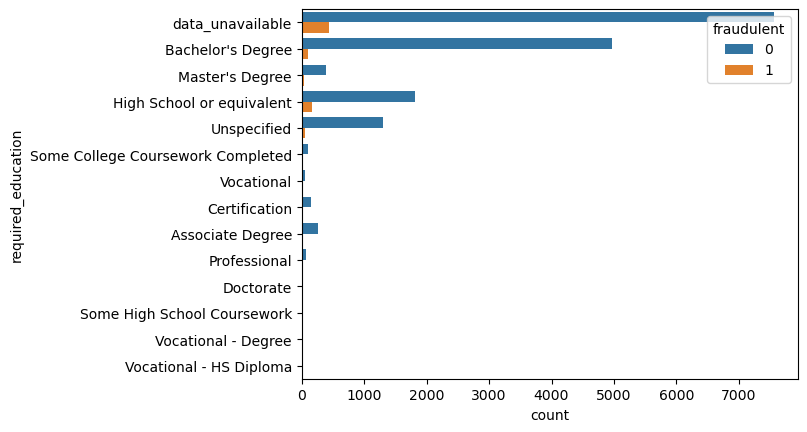

In [38]:
sns.countplot(y="required_education",hue="fraudulent",data=data);


<function matplotlib.pyplot.show(close=None, block=None)>

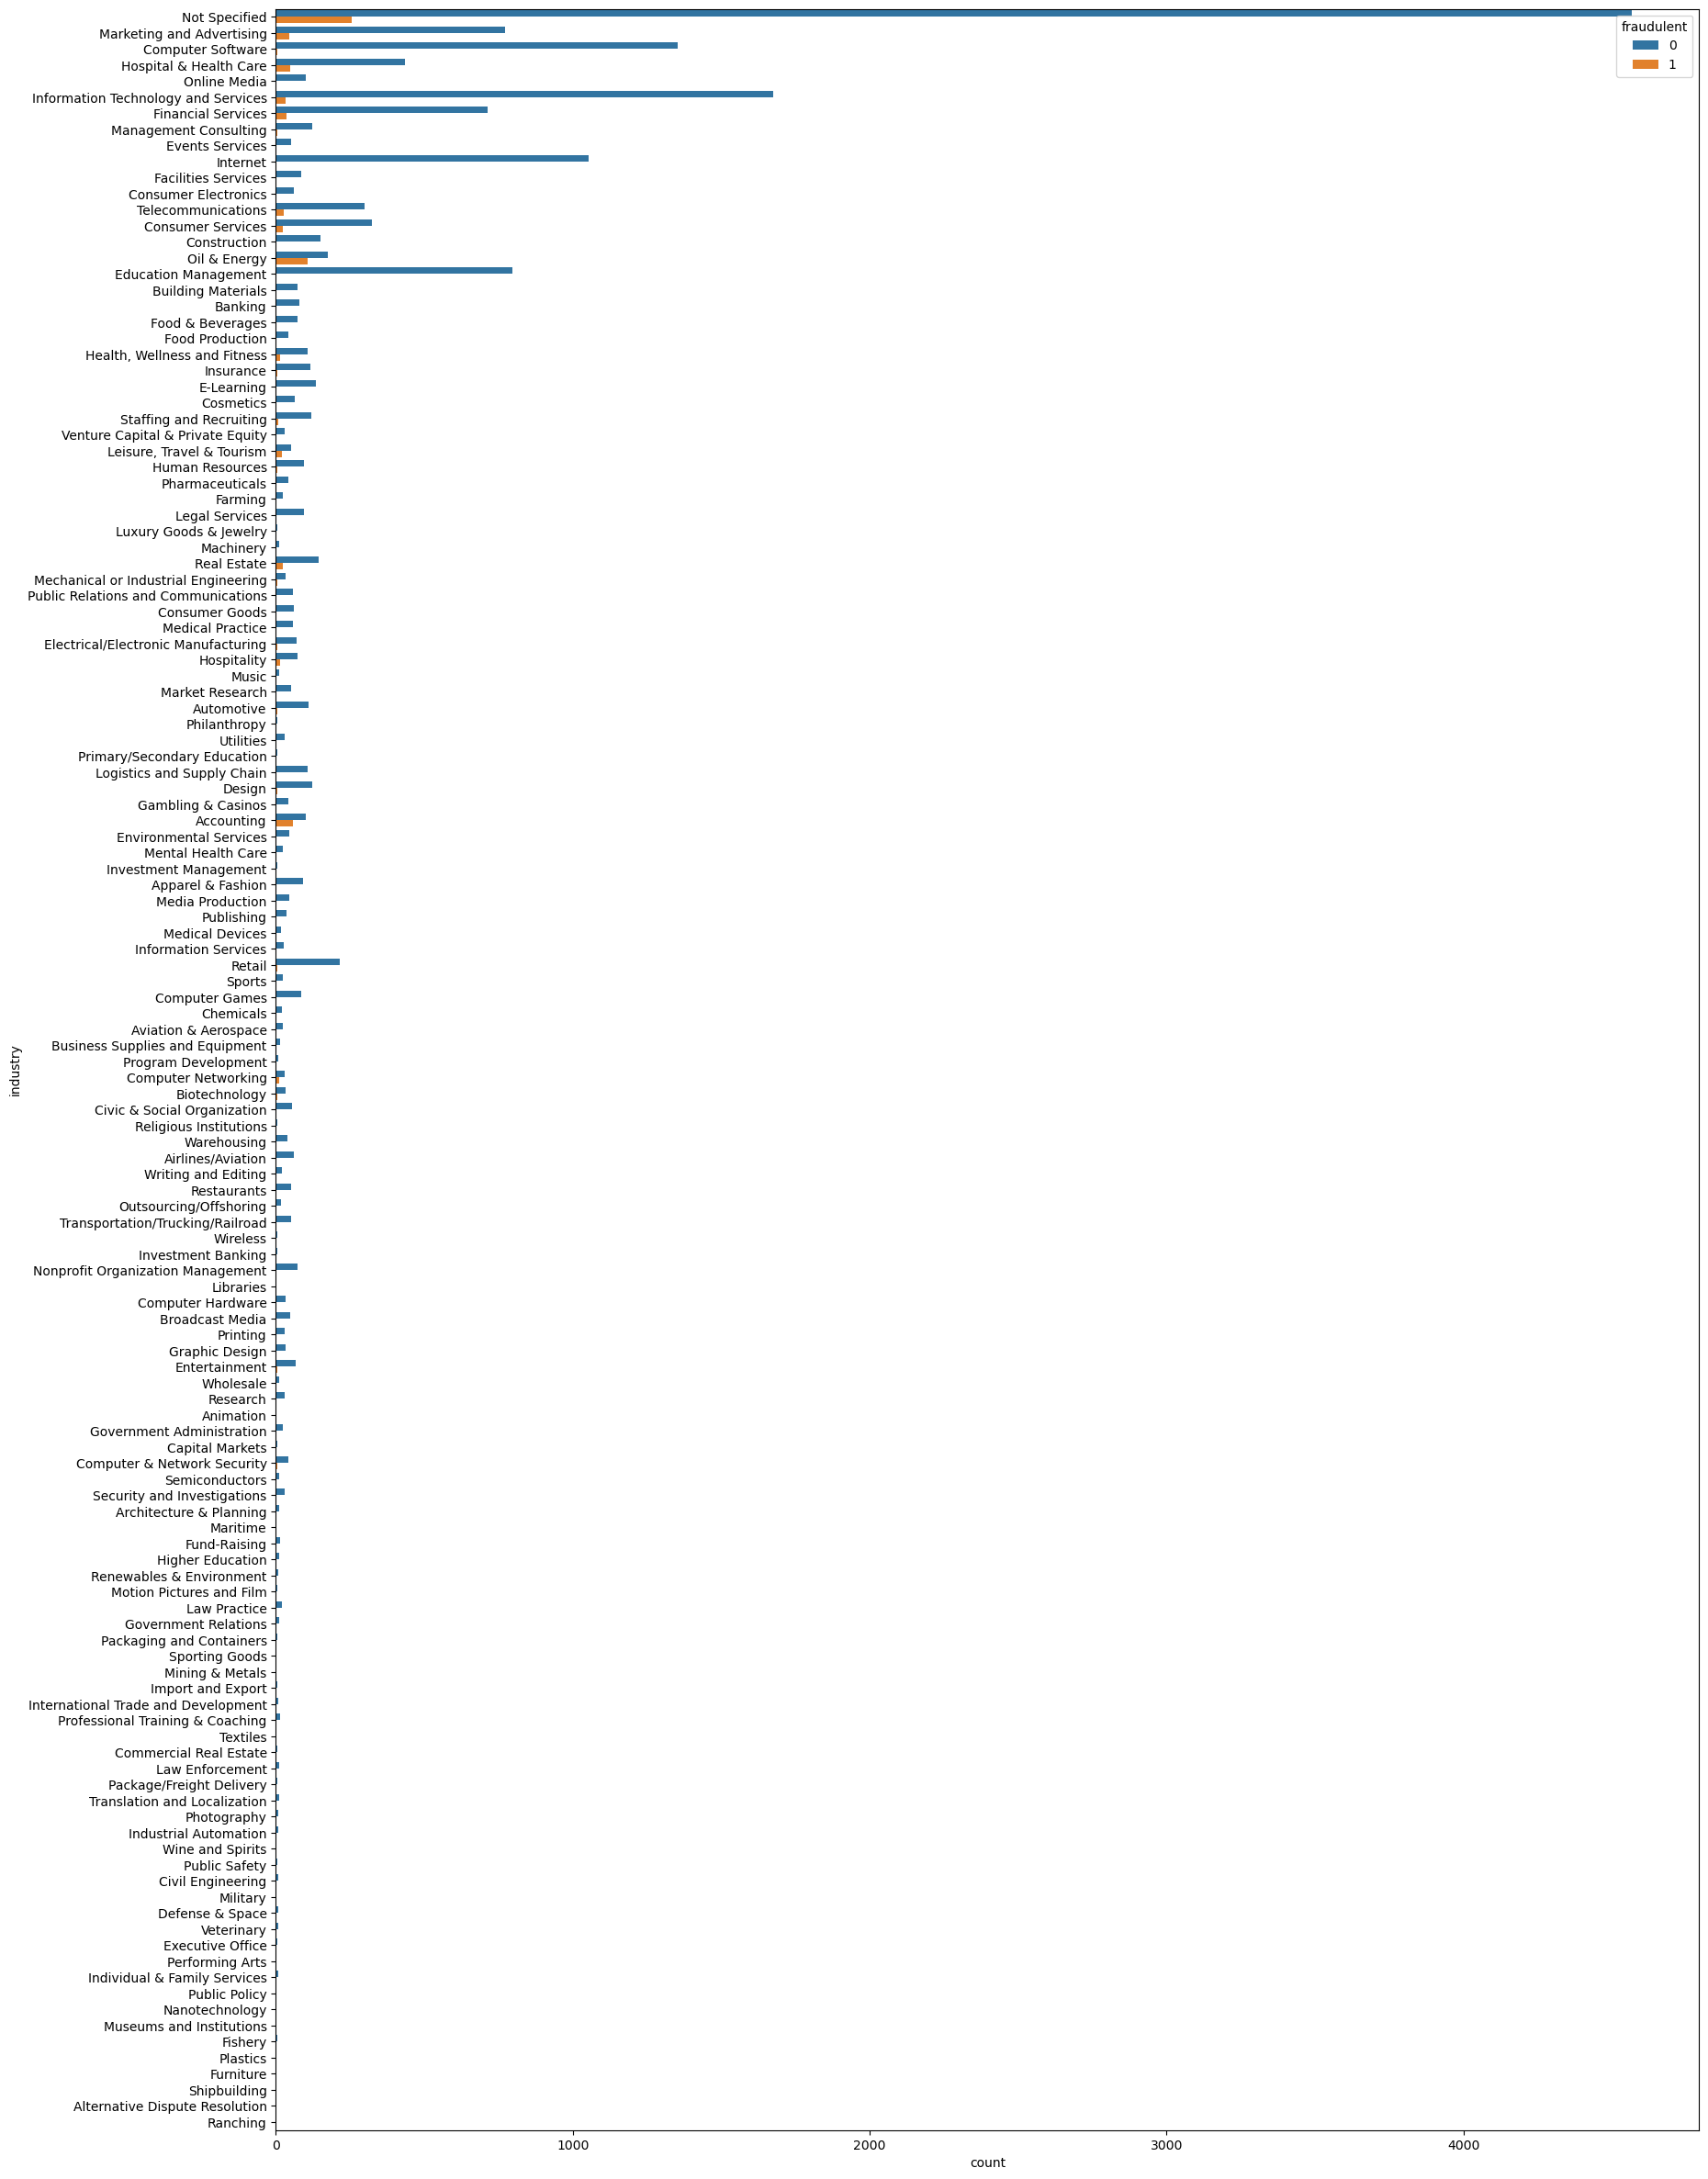

In [39]:
plt.figure(figsize=(20,30))
sns.countplot(y="industry",hue="fraudulent",data=data);
plt.show

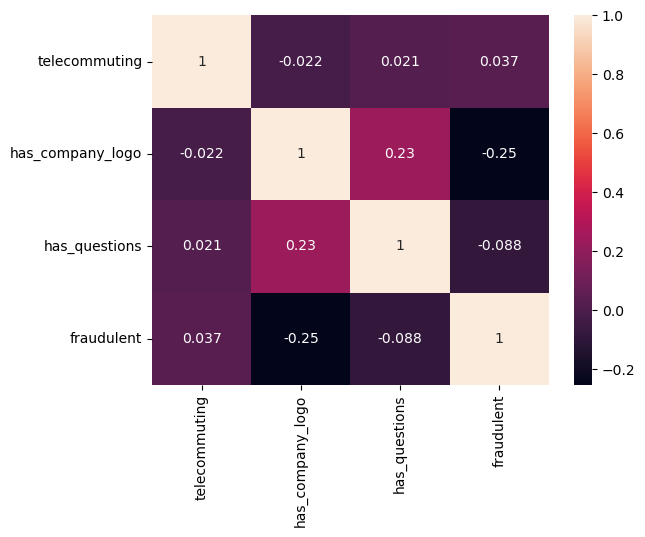

In [40]:
sns.heatmap(data[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

In [41]:
data.drop(['title', 'description','company_profile','requirements','benefits'],axis=1,inplace=True)

In [42]:
data.shape

(17542, 11)

In [43]:
data.drop(['city','country'],axis=1,inplace=True)

In [44]:
data.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [47]:
#one hot encoding
data1=pd.get_dummies(data,drop_first=True)

In [48]:
#spliting data
x=data1.drop('fraudulent',axis=1)
y=data1['fraudulent']

In [49]:
x.shape

(17542, 196)

In [50]:
y.shape

(17542,)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, random_state=100)

In [52]:
#balancing data

In [53]:
#smote
from imblearn.over_sampling import SMOTE

In [54]:
smt=SMOTE()
x_train_smo,y_train_smo = smt.fit_resample(x_train,y_train)

In [55]:
from collections import Counter
print('old data shape{}'.format(Counter(y_train)))
print('resampled data shape{}'.format(Counter(y_train_smo)))

old data shapeCounter({0: 12543, 1: 613})
resampled data shapeCounter({1: 12543, 0: 12543})


In [56]:
x_test.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type_Full-time', 'employment_type_Not Specified',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'required_experience_Director',
       'required_experience_Entry level',
       ...
       'function_Public Relations', 'function_Purchasing',
       'function_Quality Assurance', 'function_Research', 'function_Sales',
       'function_Science', 'function_Strategy/Planning',
       'function_Supply Chain', 'function_Training',
       'function_Writing/Editing'],
      dtype='object', length=196)

In [57]:
#model building

In [58]:
#logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [60]:
lr_model=lr.fit(x_train_smo,y_train_smo)
y_pred_lr = lr.predict(x_test)

In [61]:
y_pred_lr

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,classification_report

In [63]:
print('Accuracy :',accuracy_score(y_test,y_pred_lr))

Accuracy : 0.847469220246238


In [64]:
precision_score(y_test,y_pred_lr)

0.22236180904522612

In [65]:
recall_score(y_test,y_pred_lr)

0.7797356828193832

In [66]:
f1_score(y_test,y_pred_lr)

0.34604105571847504

In [67]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      4159
           1       0.22      0.78      0.35       227

    accuracy                           0.85      4386
   macro avg       0.60      0.82      0.63      4386
weighted avg       0.95      0.85      0.88      4386



In [68]:
confusion_matrix(y_test,y_pred_lr)

array([[3540,  619],
       [  50,  177]], dtype=int64)

In [69]:
y_test.shape

(4386,)

In [70]:
y_test.value_counts()

0    4159
1     227
Name: fraudulent, dtype: int64

In [71]:
lr_model.score(x_test,y_test)

0.847469220246238

In [72]:
##knn

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(x_train_smo,y_train_smo)
y_pred = knn.predict(x_test)

In [75]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8392612859097127


In [76]:
precision_score(y_test,y_pred)

0.22963800904977374

In [77]:
recall_score(y_test,y_pred)

0.8942731277533039

In [78]:
f1_score(y_test,y_pred)

0.36543654365436545

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4159
           1       0.23      0.89      0.37       227

    accuracy                           0.84      4386
   macro avg       0.61      0.87      0.64      4386
weighted avg       0.95      0.84      0.88      4386



In [80]:
knn_model.score(x_test,y_test)

0.8392612859097127

In [81]:
##svc

In [82]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc_model=svc.fit(x_train_smo,y_train_smo)
y_pred = svc.predict(x_test)

In [83]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8568171454628363


In [84]:
precision_score(y_test,y_pred)

0.22646657571623466

In [85]:
recall_score(y_test,y_pred)

0.7312775330396476

In [86]:
f1_score(y_test,y_pred)

0.3458333333333333

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      4159
           1       0.23      0.73      0.35       227

    accuracy                           0.86      4386
   macro avg       0.60      0.80      0.63      4386
weighted avg       0.94      0.86      0.89      4386



In [88]:
svc_model.score(x_test,y_test)

0.8568171454628363

In [89]:
#decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model=dt.fit(x_train_smo,y_train_smo)
y_pred_dt = dt.predict(x_test)

In [91]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8568171454628363


In [92]:
precision_score(y_test,y_pred)

0.22646657571623466

In [93]:
recall_score(y_test,y_pred)

0.7312775330396476

In [94]:
f1_score(y_test,y_pred)

0.3458333333333333

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      4159
           1       0.23      0.73      0.35       227

    accuracy                           0.86      4386
   macro avg       0.60      0.80      0.63      4386
weighted avg       0.94      0.86      0.89      4386



In [96]:
dt_model.score(x_test,y_test)

0.894436844505244

In [97]:
#random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model=rf.fit(x_train_smo,y_train_smo)
y_pred_rf = rf.predict(x_test)

In [99]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8568171454628363


In [100]:
precision_score(y_test,y_pred)

0.22646657571623466

In [101]:
recall_score(y_test,y_pred)

0.7312775330396476

In [102]:
f1_score(y_test,y_pred)

0.3458333333333333

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      4159
           1       0.23      0.73      0.35       227

    accuracy                           0.86      4386
   macro avg       0.60      0.80      0.63      4386
weighted avg       0.94      0.86      0.89      4386



In [104]:
rf_model.score(x_test,y_test)

0.9026447788417693

In [105]:
#cross validation

In [106]:
#kfold

In [107]:
from sklearn.model_selection import KFold

In [108]:
kfold_validator = KFold(10)

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
#lr
cv_result= cross_val_score(lr_model, x, y, cv=kfold_validator)
cv_result

array([0.97663818, 0.95498575, 0.9640821 , 0.93215507, 0.94868871,
       0.97491448, 0.97035348, 0.99315849, 0.995439  , 0.82896237])

In [111]:
np.mean(cv_result)

0.9539377637439213

In [112]:
#knn
cv_result= cross_val_score(knn_model, x, y, cv=kfold_validator)
cv_result

array([0.98119658, 0.95840456, 0.96693273, 0.94184721, 0.96465222,
       0.98346636, 0.97035348, 0.99144812, 0.99144812, 0.88369441])

In [113]:
np.mean(cv_result)

0.9633443784983123

In [114]:
#dt
cv_result= cross_val_score(dt_model, x, y, cv=kfold_validator)
cv_result

array([0.97549858, 0.95783476, 0.97662486, 0.93386545, 0.97947548,
       0.98232611, 0.97491448, 0.99144812, 0.98631699, 0.89338655])

In [115]:
np.mean(cv_result)

0.9651691372101862

In [116]:
#rf
cv_result= cross_val_score(rf_model, x, y, cv=kfold_validator)
cv_result

array([0.98176638, 0.96524217, 0.97833523, 0.94754846, 0.98574686,
       0.98688712, 0.98118586, 0.995439  , 0.99201824, 0.89338655])

In [117]:
np.mean(cv_result)

0.9707555867419039

In [118]:
#svc
cv_result= cross_val_score(svc_model, x, y, cv=kfold_validator)
cv_result

array([0.97777778, 0.95555556, 0.95952109, 0.91562144, 0.95324971,
       0.97719498, 0.97263398, 0.99144812, 0.99486887, 0.82269099])

In [119]:
np.mean(cv_result)

0.9520562523755226

In [120]:
##stratifiedKfold

In [121]:
from sklearn.model_selection import StratifiedKFold

In [122]:
skfold_validator = StratifiedKFold(n_splits=10)

In [123]:
#lr
skvc_result = cross_val_score(lr_model, x, y, cv=skfold_validator)
skvc_result

array([0.95156695, 0.95669516, 0.95210946, 0.96465222, 0.94697834,
       0.95153934, 0.95667047, 0.95496009, 0.95952109, 0.95952109])

In [124]:
np.mean(skvc_result)

0.9554214217726191

In [125]:
#knn
skvc_result = cross_val_score(knn_model, x, y, cv=skfold_validator)
skvc_result

array([0.96752137, 0.96182336, 0.96009122, 0.97263398, 0.96294185,
       0.96294185, 0.9663626 , 0.9686431 , 0.96579247, 0.9709236 ])

In [126]:
np.mean(skvc_result)

0.9659675402092734

In [127]:
#dt
skvc_result = cross_val_score(dt_model, x, y, cv=skfold_validator)
skvc_result

array([0.96353276, 0.95726496, 0.9618016 , 0.95496009, 0.97833523,
       0.96522235, 0.96750285, 0.96750285, 0.9663626 , 0.9686431 ])

In [128]:
np.mean(skvc_result)

0.9651128393545726

In [129]:
#svc
skvc_result = cross_val_score(svc_model, x, y, cv=skfold_validator)
skvc_result

array([0.95156695, 0.95156695, 0.95096921, 0.95153934, 0.95210946,
       0.95210946, 0.95381984, 0.95210946, 0.95324971, 0.95153934])

In [130]:
np.mean(skvc_result)

0.9520579741218281

In [131]:
#rf
skvc_result = cross_val_score(rf_model, x, y, cv=skfold_validator)
skvc_result

array([0.97037037, 0.96923077, 0.96237172, 0.97149373, 0.98118586,
       0.9709236 , 0.97149373, 0.96978335, 0.9709236 , 0.97491448])

In [132]:
np.mean(skvc_result)

0.97126912194187